# Cell 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix


# Cell 2: Load the Dataset


In [2]:
# Load resume.csv
df = pd.read_csv('/kaggle/input/resume-dataset/Resume/Resume.csv')

# Display the first few rows
df.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


# Cell 3: Check for Missing Values and Data Types

In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)


Missing Values:
 ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

Data Types:
 ID              int64
Resume_str     object
Resume_html    object
Category       object
dtype: object


# Cell 4: Advanced Text Preprocessing Using SpaCy

In [5]:
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization and Lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return ' '.join(tokens)

# Apply preprocessing
df['clean_resume'] = df['Resume_str'].apply(clean_text)

# Show preprocessed text
df[['Resume_str', 'clean_resume']].head()


,Resume_str,clean_resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administratormarkete associate hr administr...
1,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist hr operation summary versatile m...
2,HR DIRECTOR Summary Over 2...,hr director summary year experience recruit pl...
3,HR SPECIALIST Summary Dedica...,hr specialist summary dedicate driven dynamic ...
4,HR MANAGER Skill Highlights ...,hr manager skill highlight hr skill hr departm...


# Cell 5: Encode Categories (Target Variable)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode category labels
label_encoder = LabelEncoder()
df['Category_label'] = label_encoder.fit_transform(df['Category'])

# Display mapping of categories
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)


Category Mapping: {'ACCOUNTANT': 0, 'ADVOCATE': 1, 'AGRICULTURE': 2, 'APPAREL': 3, 'ARTS': 4, 'AUTOMOBILE': 5, 'AVIATION': 6, 'BANKING': 7, 'BPO': 8, 'BUSINESS-DEVELOPMENT': 9, 'CHEF': 10, 'CONSTRUCTION': 11, 'CONSULTANT': 12, 'DESIGNER': 13, 'DIGITAL-MEDIA': 14, 'ENGINEERING': 15, 'FINANCE': 16, 'FITNESS': 17, 'HEALTHCARE': 18, 'HR': 19, 'INFORMATION-TECHNOLOGY': 20, 'PUBLIC-RELATIONS': 21, 'SALES': 22, 'TEACHER': 23}


# Cell 6: Train-Test Split

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_resume'], df['Category_label'], test_size=0.2, random_state=42, stratify=df['Category_label'])

# Print dataset sizes
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 1987, Testing samples: 497


# Cell 7: TF-IDF Vectorization

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Transform text data into feature vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print feature shape
print(f"TF-IDF Shape (Train): {X_train_tfidf.shape}, (Test): {X_test_tfidf.shape}")


TF-IDF Shape (Train): (1987, 5000), (Test): (497, 5000)


# Cell 8: Train Decision Tree Classifier

In [11]:
# Initialize Decision Tree Model
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train model
dt_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test_tfidf)


# Cell 9: Evaluate Model Performance

In [12]:
# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.5372
Precision: 0.5595
Recall: 0.5372
F1 Score: 0.5445
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.55      0.50      0.52        24
           2       0.27      0.31      0.29        13
           3       0.40      0.42      0.41        19
           4       0.21      0.33      0.25        21
           5       0.00      0.00      0.00         7
           6       0.62      0.54      0.58        24
           7       0.37      0.30      0.33        23
           8       0.00      0.00      0.00         4
           9       0.74      0.58      0.65        24
          10       0.90      0.75      0.82        24
          11       0.91      0.91      0.91        22
          12       0.33      0.39      0.36        23
          13       0.86      0.86      0.86        21
          14       0.29      0.32      0.30        19
          15       0.76      0

# Cell 10: Plot Confusion Matrix

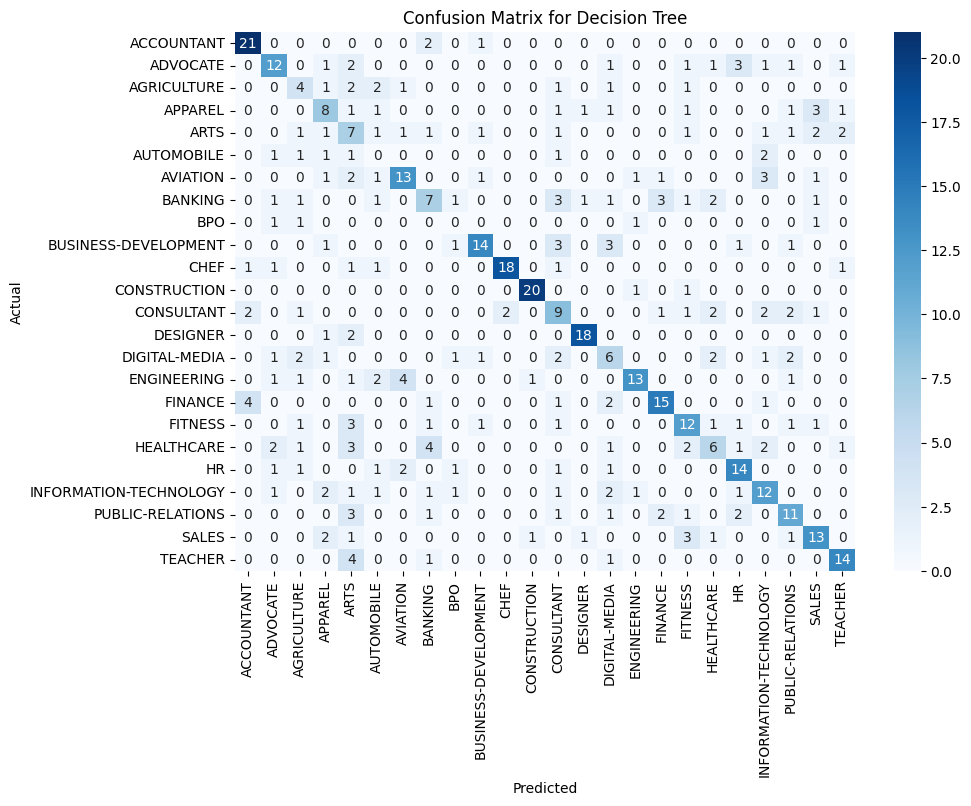

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()
